# Gas Dynamical Friction

In [4]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sim = rebound.Simulation()
sim.add(m=4e6, hash="bh") # SMBH
sim.add(m=1., a=206000, e=0.01, inc=0.17, hash="star")
sim.move_to_com()
sim.integrator = "BS"

import reboundx
rebx = reboundx.Extras(sim)
gdf = rebx.load_force("gas_df")
rebx.add_force(gdf)

gdf.params["gas_df_rhog"] = 0.2
gdf.params["gas_df_alpha_rhog"] = -1.5
gdf.params["gas_df_cs"] = 20
gdf.params["gas_df_alpha_cs"] = -0.5
gdf.params["gas_df_xmin"] = 0.045
gdf.params["gas_df_hr"] = 0.01
gdf.params["gas_df_Qd"] = 5.0

delta_t = 6.28e5
orb_data = np.zeros((100, 4))
for ii in range(100):
    sim.integrate(sim.t + delta_t)
    orb = sim.particles[1].calculate_orbit(primary = sim.particles[0])
    orb_data[ii] = (sim.t, orb.a, orb.e, orb.inc)

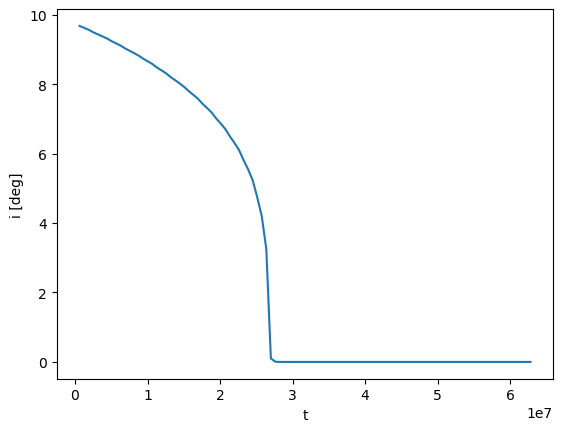

In [6]:
fig,ax = plt.subplots()
ax.set_ylabel('i [deg]')
ax.set_xlabel('t')
ax.plot(orb_data[:,0], orb_data[:,3] * 180. / np.pi)